# Live Workshop Tutorial

## Introduction

This online tutorial was created for a live data visualization workshop held at Sydney University in May 2022.

The purpose of this tutorial is to get you up and running with simple data visualisations in Python as quickly as possible - no prior experience required!

### How should I use this tutorial?

First we will need to initialize the Python environment for this tutorial.

You can click on any of the 3 options below:

1. [Google Colab Notebook](https://colab.research.google.com/github/datawithdanny/dataviz-bootcamp/blob/main/book/workshop.ipynb)
2. [Binder JupyterHub Instance](https://mybinder.org/v2/gh/datawithdanny/dataviz-bootcamp/main?urlpath=lab/tree/book/workshop.ipynb)
3. <a onclick="initThebeSBT()">Make this page an interactive book</a>

:::{admonition} Danny's Recommendation
:class: tip

This tutorial was designed with interactivity in mind so the main focus should be:

1. Running the Python code
2. Try to understand what it's doing
3. Make changes and run it again to see what happens
4. Iterate and keep improving
:::

## Getting Help

If you have any questions or spot any errors - please [add a new GitHub issue](https://github.com/datawithdanny/dataviz-bootcamp/issues/new?title=Issue%20on%20page%20%2Fworkshop.html&body=Your%20issue%20content%20here.) directly at our repo.

We're a pretty lot but if we've got some time, we'll try our best to help provide some guidance :)

You can also support our data educational initiatives by:

* **[Adding a ⭐️ to our GitHub Repo](https://github.com/DataWithDanny/dataviz-bootcamp)**
* **Follow us on LinkedIn!**
    + [Danny](https://www.linkedin.com/in/datawithdanny/)
    + [Akshaya](https://www.linkedin.com/in/akshaya-parthasarathy23/)
    + [Leah](https://www.linkedin.com/in/ndleah/)
* **Join us at [Data With Danny!](https://wwww.datawithdanny.com)**

:::{admonition} Important for Google Collab
:class: warning

On Google Colab notebooks - the version of Matplotlib package is outdated and will not work with all the code from this tutorial!

The command to update this package is:

```base
pip install --upgrade matplotlib==3.5.1
```

To run this update, you will need to uncomment the following code cell below as instructed and run it. Please follow the prompts to re-initialize the Jupyter Notebook kernel before continuing with the tutorial!
:::

In [241]:
# Uncomment the line below by removing the hashtag at the front - keep the `!` though!
#!pip install --upgrade matplotlib==3.5.1

## Import Python Packages

You will see this a lot in your future data adventures :)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Getting The Data

We can run the following cell block to grab the data from a GitHub repo URL where this entire tutorial is stored!

In [4]:
# load our video game sales dataset
df = pd.read_csv("https://raw.githubusercontent.com/DataWithDanny/dataviz-bootcamp/main/book/data/video-game-sales.csv")

# show the first 5 rows
df.head()

,rank,game,platform,release_year,genre,publisher,north_america,europe,japan,other,total_sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


## Case Study Summary

Imagine you're an analyst at a data consultancy and we have a project with our new client - Off Switch Gaming™️

Our client is a global company and they've commissioned us to help them tell a data driven story about the transformation of video games over the past 2 decades.

In particular the Off Switch team wants us to use a particular data asset one of their team members scraped from the web.

The dataset includes the following fields:

| Column Name   | Description                      |
| ------------- | -------------------------------- |
| rank          | Game ranking by global sales     |
| game          | Name of the game                 |
| platform      | Name of the gaming platform      |
| release_year  | Year a game was released in YYYY |
| genre         | Game genre                       |
| publisher     | Name of the game publisher       |
| north_america | USA & Canada sales in $ millions |
| europe        | Europe sales in $ millions       |
| japan         | Japan sales in $ millions        |
| other         | All other countries sales        |
| total_sales   | Combined total sales             |

## Practice Questions

Let's answer some business questions using our data. Don't worry too much about the code used for the data manipulation, we want to focus on the raw data outputs and use these to visualize our results, and eventually use this to tell our story!

### Question 1

> How many games were released per year?

This is some Pandas code in the cell below to perform the required data manipulation.

Each line below does something, so once you're comfortable with the output - try playing around with the code below to see how your changes affect the output.

In [78]:
# we can assign a new variable to the Python operations using `=`
# using the brackets () is known as "chaining" and makes code look nice
q1_dataset = (
    df["release_year"]
        .value_counts(sort=False)
        .reset_index(name="games_count")
        .rename(columns={"index": "release_year"})
)

# below we can just show our resulting dataset like so
q1_dataset

,release_year,games_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Next we can do some basic plotting with `q1_dataset` - I think a basic line chart is a nice place to start.

Let's try to change some of the code below to create something a bit more meaningful.

**Note**: if you're on Google Colab and haven't yet updated the `matplotlib` using `!pip install --upgrade matplotlib==3.5.1` then the following code block will give you an error

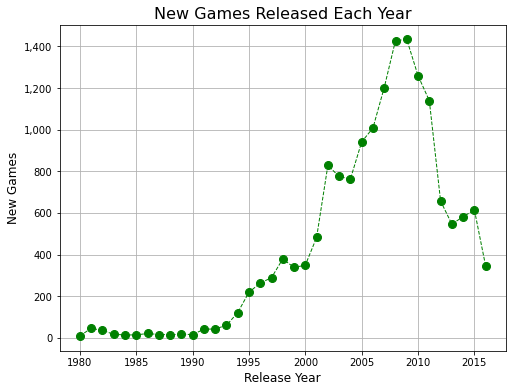

In [84]:
fig1, ax1 = plt.subplots(figsize=(8,6))  # set the size of the chart

plt.plot(
    q1_dataset["release_year"],  # x-values
    q1_dataset["games_count"],   # y-values
    # additional aesthetic options you can play around with
    # view all options here: 
    color='green',               
    marker='o',
    linestyle='dashed',
    linewidth=1,
    markersize=8
)
# you may want to update some of this below!
plt.grid(True)
plt.title('New Games Released Each Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('New Games', fontsize=12)

# after plotting the data, format the labels with thousands comma separator
# yeah I know, the formatting input is x but the axis is y - deal with it...
ax1.yaxis.set_major_formatter('{x:,.0f}')
ax1.tick_params(axis='y',which='major')

# you can uncomment these next 2 lines to see what happens
# ax.xaxis.set_major_formatter('{x:,.0f}')
# ax.tick_params(axis='x',which='major')

# show the chart
plt.show()

# uncomment the code below to save the chart to a file
# you can also change the name of the file output too
# plt.savefig('yearly_game_releases.png')

# you can also uncomment the next line to create a new directory
# and save the file to a specific path
# if not os.path.exists('outputs'):
#     os.makedirs('outputs')
# plt.savefig('outputs/yearly_game_releases.png')

### Question 2

> What are top 5 most popular game ever based on global sales?

In [187]:
q2_dataset = (
    df[df["rank"] <= 5]
        [["game", "rank", "total_sales"]]
        .sort_values("rank")
)

q2_dataset

,game,rank,total_sales
6112,Wii Sports,1,82.74
122,Super Mario Bros.,2,40.24
8322,Mario Kart Wii,3,35.82
9750,Wii Sports Resort,4,33.00
705,Pokemon Red/Pokemon Blue,5,31.37


This dataset by itself is quite explanatory - however we can make the story go a little bit further.

What if we were to also calculate the percentage of all sales ever these top 5 games make up?

We can use this insight as a headline subtitle for our following simple chart to jazz things up a little.

In [202]:
top_5_sales = q2_dataset["total_sales"].sum()
all_sales_ever =  df["total_sales"].sum()

top_5_sales_percentage = top_5_sales / all_sales_ever

# this is called f-string interpolation
top_5_insight = f"The top 5 games made ${top_5_sales:.0f}M in global sales, that's {top_5_sales_percentage:.1%} of all sales ever!"

print(top_5_insight)

The top 5 games made $223M in global sales, that's 2.5% of all sales ever!


Now we can apply a simple horizontal barchart to visualise our top 5 games and their relative sales performance.

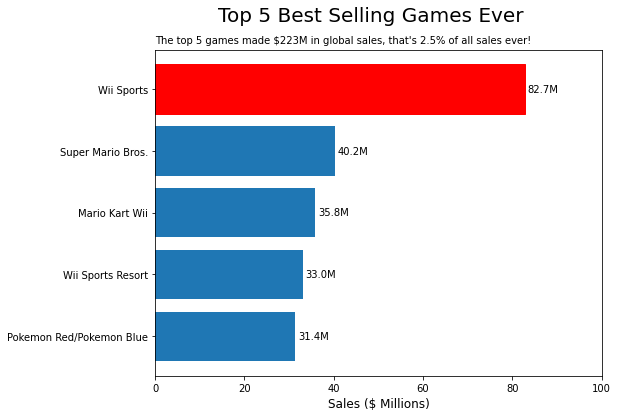

In [217]:
fig2, ax2 = plt.subplots(figsize=(8,6))  # set the size of the chart

horizontal_barchart = plt.barh(
    q2_dataset["game"],       # bar chart categories
    q2_dataset["total_sales"] # bar chart values
)

# Changing the titles and labels of x-y axes
plt.suptitle('Top 5 Best Selling Games Ever', fontsize=20)
plt.title(top_5_insight, fontsize=10, loc="left")
plt.xlabel('Sales ($ Millions)', fontsize=12)

# We can set specific limits for our x-axis to control the width
# try commenting out the line below to see what happens
plt.xlim(0, 100)

# Set the chart order and color the top sales genre red
ax2.invert_yaxis()  # sort Y categories in reverse order from largest to smallest
horizontal_barchart[0].set_color('r')  # update the colour of the first bar

# this next step applies the label_formattr function using list comprehension
ax2.bar_label(
    horizontal_barchart,
    padding=3,  # this is the distance the label text starts from the bar
    fmt="%.1fM"
)

# show the chart
plt.show()

# uncomment the code below to save the chart to a file
# you can also change the name of the file output too
# plt.savefig('q2_top_5_games.png')

# you can also uncomment the next line to create a new directory
# and save the file to a specific path
# if not os.path.exists('outputs'):
#     os.makedirs('outputs')
# plt.savefig('outputs/q2_top_5_games.png')

### Question 3

> What are the top genres by sales?

Let's use the `total_sales` to apply a simple group by aggregate sum calculation and sort the values in descending order.

In [86]:
q3_dataset = (
    df.groupby(["genre"])
        .agg(sales=("total_sales", "sum"))
        .sort_values("sales", ascending=False)
)

q3_dataset

,sales
genre,
Action,1722.87
Sports,1309.24
Shooter,1026.20
Role-Playing,923.80
Platform,829.15
Misc,797.62
Racing,726.77
Fighting,444.05
Simulation,390.16


We can use a simple horizontal bar chart for this type of data.

The horizontal orientation let's the viewer easily read the name of the genre without needing to rotate their head 45 degrees.

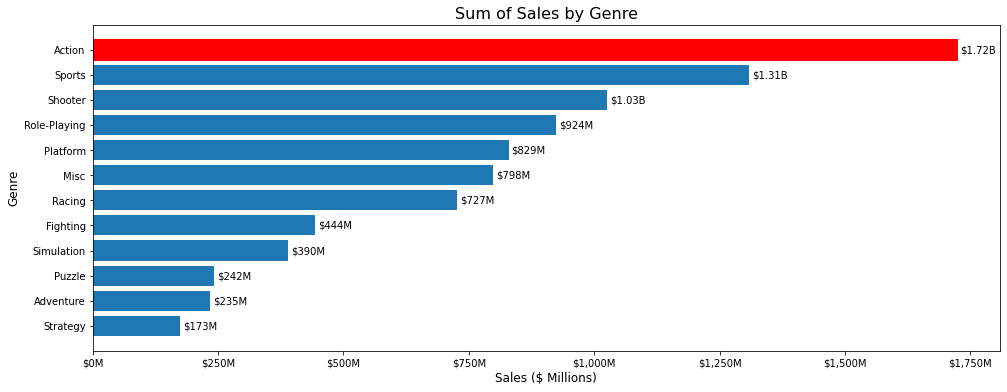

In [224]:
fig3, ax3 = plt.subplots(figsize=(8,6))  # set the size of the chart

horizontal_barchart = plt.barh(
    q3_dataset.index,    # bar chart categories
    q3_dataset["sales"] # bar chart values
)

# Changing the titles and labels of x-y axes
plt.title('Sum of Sales by Genre', fontsize=16)
plt.xlabel('Sales ($ Millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Set the chart order and color the top sales genre red
ax3.invert_yaxis()  # sort Y categories in reverse order from largest to smallest
horizontal_barchart[0].set_color('r')  # update the colour of the first bar

# We can change the formatting for the x-axis with a $ and M
ax3.xaxis.set_major_formatter('${x:,.0f}M')
ax3.tick_params(axis='y',which='major')

# We can also do some more custom formatting of the data label
# First we define a function to help with custom formatted label
def label_formatter(x):
    if x > 1e3:
        return f'${x/1e3:,.2f}B'
    else:
        return f'${x:,.0f}M'

# The following is a bit of a hacky way to assign new labels
# this helps us get the barplot rectangles
container = ax3.containers[0]  
# this next step applies the label_formattr function using list comprehension
ax3.bar_label(
    container,
    padding=3,  # this is the distance the label text starts from the bar
    labels=[label_formatter(x) for x in container.datavalues]
)

# This shifts the right edge of the plot to fit the labels
plt.subplots_adjust(right=1.7)

# show the chart
plt.show()

# uncomment the code below to save the chart to a file
# you can also change the name of the file output too
# plt.savefig('q3_genre_sales.png')

# you can also uncomment the next line to create a new directory
# and save the file to a specific path
# if not os.path.exists('outputs'):
#     os.makedirs('outputs')
# plt.savefig('outputs/q3_genre_sales.png')

For the following questions - I'll generate the dataset for you, but you'll need to write the rest of the Python plotting code to generate the charts (I'll give you some pointers to guide you however!)

### Question 4

> What are the average sales for each genre?

Since the average calculation is based off total sales and the total count of games in each genre - I think it'll be useful if we include these aggregated metrics also for more insights.

In [223]:
q4_dataset = (
    df.groupby(["genre"])
        .agg(
            average_sales=("total_sales", "mean"),
            sales=("total_sales", "sum"),
            count_games=("game", "count")
        )
        .sort_values("average_sales", ascending=False)
)

q4_dataset

,average_sales,sales,count_games
genre,,,
Platform,0.946518,829.15,876
Shooter,0.800468,1026.20,1282
Role-Playing,0.628863,923.80,1469
Racing,0.592798,726.77,1226
Sports,0.568247,1309.24,2304
Fighting,0.531160,444.05,836
Action,0.529788,1722.87,3252
Misc,0.466444,797.62,1710
Simulation,0.458472,390.16,851


Now would also be a good time to check what the top games are for that `Platform` genre - does this match with what we should expect from our knowledge of the gaming industry?

In [222]:
(
    df[df["genre"] == "Platform"]
        .sort_values("total_sales", ascending=False)
        .head(5)
)

,rank,game,platform,release_year,genre,publisher,north_america,europe,japan,other,total_sales
122,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6113,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
9751,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
205,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
189,22,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14


Ok - now that we've got our dataset ready to go, I'll leave you alone to write up some code to visualize it!

In [242]:
# Your data visualization code for q5 goes below here!

### Question 5

> Which games perform the best for each genre?

To make this a bit easier to digest, let's try to identify the top 3 games for each genre and return all of their columns so we can assess what story we can tell from the data.

In [228]:
q5_dataset = (
    df
        .sort_values(["genre", "total_sales"], ascending=[True, False])
        .groupby(["genre"])
        .head(3)
        
)

q5_dataset

,rank,game,platform,release_year,genre,publisher,north_america,europe,japan,other,total_sales
14238,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
4408,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
14239,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
262,51,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
7129,159,Assassin's Creed,X360,2007,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55
7137,219,Assassin's Creed,PS3,2007,Adventure,Ubisoft,1.91,2.00,0.09,0.83,4.83
8323,40,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
14787,98,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
1259,106,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16
6114,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


This dataset looks really interesting as there are lots of variation in the data.

What sort of story do you want to tell with this data?

In [ ]:
# Your data visualization code for Q5 goes below here!

### Question 6

> What are the sales for each region?

This sort of transformation is called "melting" a dataset from wide to long - you can find more information at the Pandas documentation [here!](https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html)

In [236]:
q6_dataset = (
    pd.melt(
        df,
        ["rank","game","platform","release_year","genre","publisher"],
        ["north_america", "europe", "japan", "other"],
        "region",
        "sales"
    )
        .groupby("region")
        .agg(region_sales=("sales", "sum"))
)

q6_dataset

,region_sales
region,
europe,2409.12
japan,1284.25
north_america,4333.43
other,789.01


In [239]:
# Your data visualization code for Q6 goes below here!

### Question 7

> Which games perform the best for each region?

In [238]:
q7_dataset = (
    pd.melt(
        df,
        ["rank","game","platform","release_year","genre","publisher"],
        ["north_america", "europe", "japan", "other"],
        "region",
        "sales"
    )
        .sort_values(["region", "sales"], ascending=[True, False])
        .groupby("region")
        .head(5)
)

q7_dataset

,rank,game,platform,release_year,genre,publisher,region,sales
22436,1,Wii Sports,Wii,2006,Sports,Nintendo,europe,29.02
24646,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,europe,12.88
26074,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,europe,11.01
21495,11,Nintendogs,DS,2005,Simulation,Nintendo,europe,11.00
30562,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,europe,9.27
33353,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,japan,10.22
34284,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,japan,7.20
32770,2,Super Mario Bros.,NES,1985,Platform,Nintendo,japan,6.81
38761,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,japan,6.50
38763,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,japan,6.04


In [240]:
# Your data visualization code for Q7 goes below here!